<a href="https://colab.research.google.com/github/Antik0829/AI-Project-/blob/main/Data_Mining_Lab%20191-15-2592.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, classification_report,plot_roc_curve,plot_precision_recall_curve

%matplotlib inline

In [3]:
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/AI/cardio_train.csv',sep=';')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [7]:
df.shape

(70000, 13)

In [8]:
df.isnull().values.any()  # cheack missing value

False

In [9]:
df.isna().sum()   # check null values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.keys()   # check keys

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df.info()   ##get information about the data features, the amount of instances and the amount of Nan values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [12]:
df.drop("id",axis=1,inplace=True)

In [13]:
df.shape

(70000, 12)

In [15]:
df['cardio'].value_counts()  

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


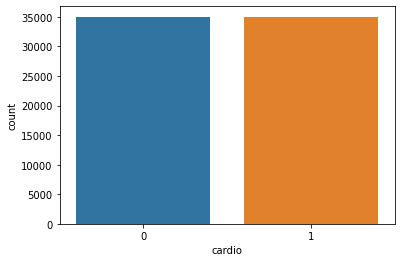

In [16]:
sns.countplot(df['cardio'])

In [17]:
females_without_cardiovascular=np.logical_and(df['gender']==1,df['cardio']==0).sum()
print("females not having cardiovascular disease = ",females_without_cardiovascular)
females_with_cardiovascular=np.logical_and(df['gender']==1,df['cardio']==1).sum()
print("females having cardiovascular disease = ",females_with_cardiovascular)
males_without_cardiovascular=np.logical_and(df['gender']==2,df['cardio']==0).sum()
print("Males not having cardiovascular disease = ",males_without_cardiovascular)
males_with_cardiovascular=np.logical_and(df['gender']==2,df['cardio']==1).sum()
print("Males having cardiovascular disease = ",males_with_cardiovascular)

females not having cardiovascular disease =  22914
females having cardiovascular disease =  22616
Males not having cardiovascular disease =  12107
Males having cardiovascular disease =  12363


In [18]:
#distribution based on Gender
print("Total females = ",df[df['gender']==1].shape[0])
print("Total males = ",df[df['gender']==2].shape[0])

Total females =  45530
Total males =  24470


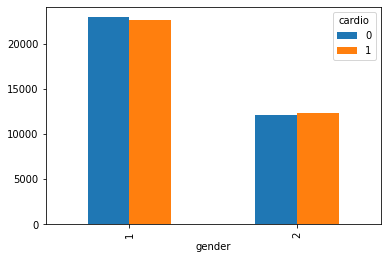

In [19]:
df.pivot_table(index='gender', columns='cardio',values='weight' , aggfunc='count').plot(kind='bar')

In [21]:
Smokers_without_cardiovascular=np.logical_and(df['smoke']==1,df['cardio']==0).sum()
print("Smokers not having cardiovascular disease = ",Smokers_without_cardiovascular)
Smokers_with_cardiovascular=np.logical_and(df['smoke']==1,df['cardio']==1).sum()
print("Smokers having cardiovascular disease = ",Smokers_with_cardiovascular)
Non_Smokers_without_cardiovascular=np.logical_and(df['smoke']==0,df['cardio']==0).sum()
print("Non Smokers not having cardiovascular disease = ",Non_Smokers_without_cardiovascular)
Non_Smokers_with_cardiovascular=np.logical_and(df['smoke']==0,df['cardio']==1).sum()
print("Non Smokers having cardiovascular disease = ",Non_Smokers_with_cardiovascular)

Smokers not having cardiovascular disease =  3240
Smokers having cardiovascular disease =  2929
Non Smokers not having cardiovascular disease =  31781
Non Smokers having cardiovascular disease =  32050


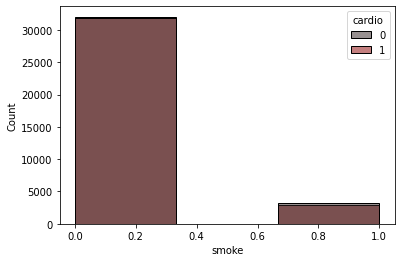

In [22]:
sns.histplot(data=df,x='smoke',bins=3,hue='cardio',palette="dark:darkred", alpha=0.5)

In [23]:
#Distribution based on if person consumes alcohol or not
print("Number of people who consume alcohol = ",df[df['alco']==1].shape[0])
print("Number of people who don't consume alcohol = ",df[df['alco']==0].shape[0])

Number of people who consume alcohol =  3764
Number of people who don't consume alcohol =  66236


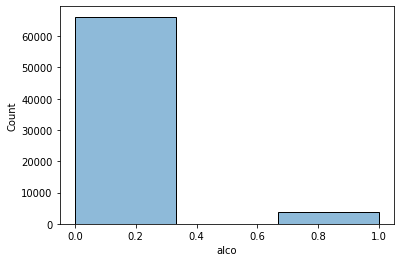

In [24]:
sns.histplot(data=df,x='alco',bins=3,palette="dark:darkred", alpha=0.5)

In [25]:
ac_without_cardiovascular=np.logical_and(df['alco']==1,df['cardio']==0).sum()
print("Alcohol consumer not having cardiovascular disease = ",ac_without_cardiovascular)
ac_with_cardiovascular=np.logical_and(df['alco']==1,df['cardio']==1).sum()
print("Alcohol consumer having cardiovascular disease = ",ac_with_cardiovascular)
nac_without_cardiovascular=np.logical_and(df['alco']==0,df['cardio']==0).sum()
print("Non alcohol consumer not having cardiovascular disease = ",nac_without_cardiovascular)
nac_with_cardiovascular=np.logical_and(df['alco']==0,df['cardio']==1).sum()
print("Non alcohol consumer having cardiovascular disease = ",nac_with_cardiovascular)

Alcohol consumer not having cardiovascular disease =  1941
Alcohol consumer having cardiovascular disease =  1823
Non alcohol consumer not having cardiovascular disease =  33080
Non alcohol consumer having cardiovascular disease =  33156


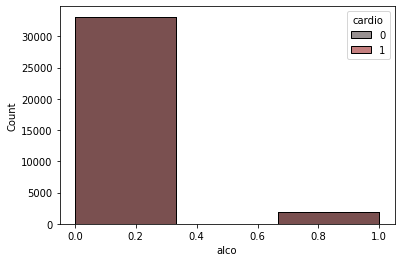

In [ ]:
sns.histplot(data=df,x='alco',bins=3,hue='cardio',palette="dark:darkred", alpha=0.5)

In [26]:
print("Number of negative values of age  = ",df[df['age']<0].shape[0])

Number of negative values of age  =  0


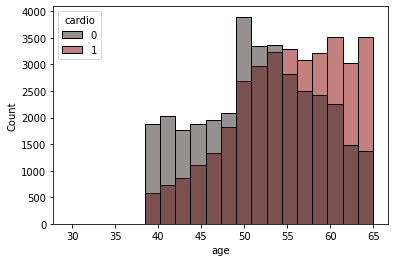

In [27]:
df['age']=df['age']/365

sns.histplot(data=df,x='age',bins=20,hue='cardio',palette="dark:darkred", alpha=0.5)

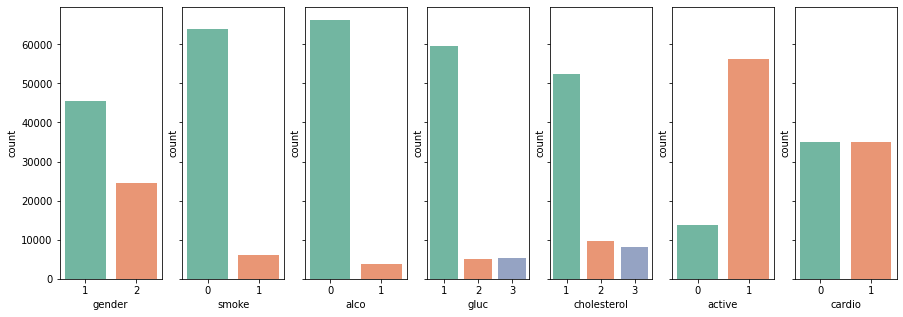

In [28]:
f, axes = plt.subplots(1, 7, figsize=(15, 5), sharex=False,sharey=True)
sns.countplot(x='gender',data=df,ax=axes[0],palette="Set2")
sns.countplot(x='smoke',data=df,ax=axes[1],palette="Set2")
sns.countplot(x='alco',data=df,ax=axes[2],palette="Set2")
sns.countplot(x='gluc',data=df,ax=axes[3],palette="Set2")
sns.countplot(x='cholesterol',data=df,ax=axes[4],palette="Set2")
sns.countplot(x='active',data=df,ax=axes[5],palette="Set2")
sns.countplot(x='cardio',data=df,ax=axes[6],palette="Set2")


In [29]:
print("There is {} duplicated values".format(df.duplicated().sum()))

There is 24 duplicated values


In [30]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2) # Show us just 1 duplication of 24

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,60.484932,1,175,69.0,120,80,1,1,0,0,1,1
45748,60.484932,1,175,69.0,120,80,1,1,0,0,1,1


In [31]:
df.duplicated().sum()

24

In [ ]:
df.drop_duplicates(inplace=True) #delete duplicates values.

In [32]:
print("There is {} duplicated values".format(df.duplicated().sum()))
print("There is {} missing values ".format(df.isnull().sum().sum()))

There is 24 duplicated values
There is 0 missing values 


In [33]:
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [34]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


In [35]:
df[(df['ap_hi'] > 180 ) | (df['ap_lo'] > 120)]  #We Don't Have Null Value But We Have Unbeleiveble Values

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
101,51.282192,1,167,80.0,190,90,2,1,0,1,0,0
228,47.915068,2,183,98.0,160,1100,1,2,1,0,1,1
241,60.087671,2,157,60.0,160,1000,2,1,0,0,0,1
260,49.909589,1,150,83.0,140,800,1,1,0,0,1,1
329,64.128767,1,176,63.0,160,1000,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69872,59.747945,1,152,56.0,160,1000,1,1,0,0,1,1
69878,58.189041,2,168,95.0,160,1000,1,1,0,0,1,1
69885,61.416438,2,166,78.0,170,1000,1,1,0,0,0,0
69894,46.183562,1,160,70.0,200,100,1,2,0,0,1,1


In [36]:
df['ap_lo'].describe()   # here min is negative ..so we need to fix this issue

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

In [37]:
df['ap_hi'].describe()  # here also min is negatvie value

count    70000.000000
mean       128.817286
std        154.011419
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

In [38]:
out_filter = ((df["ap_hi"]>250) | (df["ap_lo"]>200))

In [39]:
df = df[~out_filter]
len(df)

69007

In [40]:
out_filter2 = ((df["ap_hi"] < 0) | (df["ap_lo"] < 0))
df = df[~out_filter2]

In [41]:
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68999 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68999 non-null  float64
 1   gender       68999 non-null  int64  
 2   height       68999 non-null  int64  
 3   weight       68999 non-null  float64
 4   ap_hi        68999 non-null  int64  
 5   ap_lo        68999 non-null  int64  
 6   cholesterol  68999 non-null  int64  
 7   gluc         68999 non-null  int64  
 8   smoke        68999 non-null  int64  
 9   alco         68999 non-null  int64  
 10  active       68999 non-null  int64  
 11  cardio       68999 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.8 MB


In [44]:
target_name = 'cardio'
data_target = df[target_name]
df = df.drop([target_name], axis=1)

In [45]:
train, test, target, target_test = train_test_split(df, data_target, test_size=0.3, random_state=0)

In [46]:
len(train)


48299

In [47]:
from sklearn import metrics

**Naive Bayes**

In [48]:
gnb = GaussianNB()

In [49]:
gnb.fit(train,target)

GaussianNB(priors=None, var_smoothing=1e-09)

In [50]:
ypred = gnb.predict(test)



In [51]:
print("model accuracy(in %):", round(metrics.accuracy_score(target_test
                                                  , ypred)*100,2))

model accuracy(in %): 70.48


**Data Preprocessing**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer


In [53]:
cv= CountVectorizer()


In [54]:
x_train= cv.fit_transform(train)
x_train.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [71]:
x_test=cv.transform(test)
x_test.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [72]:
gnb.score(test,target_test)

0.7047826086956521

Performance

In [73]:
pred = gnb.predict(test)
pred

array([1, 0, 0, ..., 0, 0, 0])

In [68]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(target_test,pred)

0.7047826086956521

In [75]:
confusion_matrix(target_test,pred)

array([[8529, 1989],
       [4122, 6060]])

In [76]:
from sklearn.metrics import  classification_report
print(classification_report(target_test , pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74     10518
           1       0.75      0.60      0.66     10182

    accuracy                           0.70     20700
   macro avg       0.71      0.70      0.70     20700
weighted avg       0.71      0.70      0.70     20700



** Logistic Regression **

**Logistic Regression **

In [77]:
lg= LogisticRegression()
lg.fit(train,target)
ypred = lg.predict(test)
print("model accuracy(in %):", round(metrics.accuracy_score(target_test
                                                  , ypred)*100,2))

model accuracy(in %): 71.25


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Performance**

In [78]:
pred = lg.predict(test)
pred

array([0, 0, 0, ..., 1, 0, 0])

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
accuracy_score(target_test,pred)

0.712512077294686

In [81]:
confusion_matrix(target_test,pred)

array([[7945, 2573],
       [3378, 6804]])

In [82]:
from sklearn.metrics import  classification_report
print(classification_report(target_test , pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73     10518
           1       0.73      0.67      0.70     10182

    accuracy                           0.71     20700
   macro avg       0.71      0.71      0.71     20700
weighted avg       0.71      0.71      0.71     20700



In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
x_train= cv.fit_transform(train)
x_train.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [84]:
x_test=cv.transform(test)
x_test.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

**Random Forest**

In [85]:
rf = RandomForestClassifier()

In [86]:
rf.fit(train,target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:

ypred = rf.predict(test)
print("model accuracy(in %):", round(metrics.accuracy_score(target_test
                                                  , ypred)*100,2))

model accuracy(in %): 71.15


**Performance**

In [88]:
pred = rf.predict(test)
pred

array([1, 0, 0, ..., 0, 0, 1])

In [89]:
accuracy_score(target_test,pred)

0.7114975845410628

In [90]:
confusion_matrix(target_test,pred)

array([[7750, 2768],
       [3204, 6978]])

In [91]:
from sklearn.metrics import  classification_report
print(classification_report(target_test , pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72     10518
           1       0.72      0.69      0.70     10182

    accuracy                           0.71     20700
   macro avg       0.71      0.71      0.71     20700
weighted avg       0.71      0.71      0.71     20700



**Gaussian Naive Bayes**

In [92]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(train, target)


GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
ypred = rf.predict(test)
print("model accuracy(in %):", round(metrics.accuracy_score(target_test
                                                  , ypred)*100,2))

model accuracy(in %): 71.15


**Performance**

In [94]:
pred = gaussian.predict(test)
pred


array([1, 0, 0, ..., 0, 0, 0])

In [95]:
accuracy_score(target_test,pred)

0.7047826086956521

In [96]:
confusion_matrix(target_test,pred)

array([[8529, 1989],
       [4122, 6060]])

In [97]:
from sklearn.metrics import  classification_report
print(classification_report(target_test , pred))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74     10518
           1       0.75      0.60      0.66     10182

    accuracy                           0.70     20700
   macro avg       0.71      0.70      0.70     20700
weighted avg       0.71      0.70      0.70     20700



In [98]:
from sklearn.model_selection import train_test_split, GridSearchCV

**Models evaluation **

In [99]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_log

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


71.2

In [100]:
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
acc_test_log

71.25

In [101]:

gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_gaussian

70.75

In [102]:
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
acc_test_gaussian

70.48

In [103]:
# Random Forest

random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(train, target)
random_forest.fit(train, target)
acc_random_forest = round(random_forest.score(train, target) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

99.98 {'n_estimators': 300}


In [104]:
acc_test_random_forest = round(random_forest.score(test, target_test) * 100, 2)
acc_test_random_forest

71.33

In [105]:
pred = random_forest.predict(test)
pred

array([1, 0, 0, ..., 1, 0, 1])

In [106]:
accuracy_score(target_test,pred)

0.7132850241545894

In [107]:
confusion_matrix(target_test,pred)

array([[7744, 2774],
       [3161, 7021]])

In [108]:
from sklearn.metrics import  classification_report
print(classification_report(target_test , pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72     10518
           1       0.72      0.69      0.70     10182

    accuracy                           0.71     20700
   macro avg       0.71      0.71      0.71     20700
weighted avg       0.71      0.71      0.71     20700



In [109]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 
               
              'Random Forest'  ],
    
    'Score_train': [acc_log,  acc_gaussian, acc_random_forest],
    'Score_test': [acc_test_log,acc_test_gaussian,acc_test_random_forest]
                    })

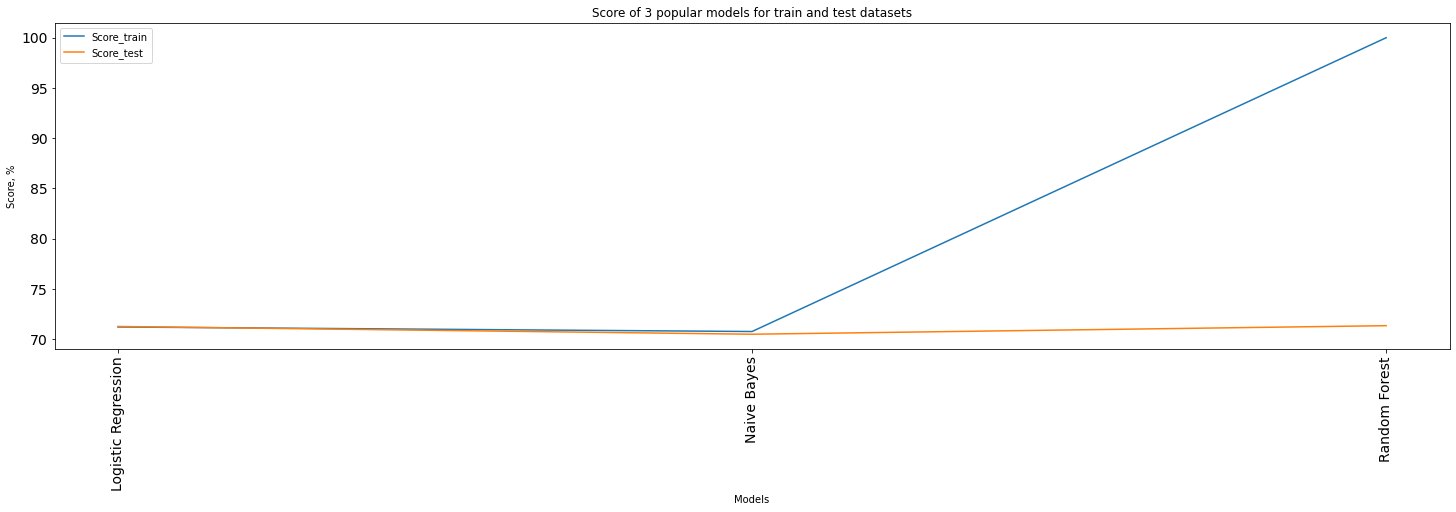

In [110]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Score of 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()